# # The objective of this work is to use Spark SQL to analyze the FIFA18 CompleteDataset using Exploratory analysis.  We ask and asnswer questions about the dataset using both Pandas and SQL DataFrames, and as well visualise it using Pandas and Matplotlib lbraries. 

In [1]:
# importing the required libraries
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .appName('Python Spark SQL basic Example')\
        .config('spark.some.config.option', 'some value')\
        .getOrCreate()

In [2]:
# load data
fifa_df = spark.read.load("/home/bigdata/Desktop/CompleteDataset.csv", format="csv", inferSchema=True, header=True)
fifa_df.show()

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

# Explanatory Data Analysis

### Exploration using DataFrame

In [4]:
# exploring data
fifa_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [5]:
# checking the names of columns in the Dataset
fifa_df.columns

['_c0',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'Club Logo',
 'Value',
 'Wage',
 'Special',
 'Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'Ball control',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Free kick accuracy',
 'GK diving',
 'GK handling',
 'GK kicking',
 'GK positioning',
 'GK reflexes',
 'Heading accuracy',
 'Interceptions',
 'Jumping',
 'Long passing',
 'Long shots',
 'Marking',
 'Penalties',
 'Positioning',
 'Reactions',
 'Short passing',
 'Shot power',
 'Sliding tackle',
 'Sprint speed',
 'Stamina',
 'Standing tackle',
 'Strength',
 'Vision',
 'Volleys',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'ID',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'Preferred Positions',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST']

In [6]:
# checking the number of rows in the Dataset
fifa_df.count()

17981

In [7]:
# checking the number of columns in the Dataset
len(fifa_df.columns)

75

In [8]:
# selecting some columns
fifa_df.select('Name', 'Nationality', 'Club').show()

+-----------------+-----------+-------------------+
|             Name|Nationality|               Club|
+-----------------+-----------+-------------------+
|Cristiano Ronaldo|   Portugal|     Real Madrid CF|
|         L. Messi|  Argentina|       FC Barcelona|
|           Neymar|     Brazil|Paris Saint-Germain|
|        L. Suárez|    Uruguay|       FC Barcelona|
|         M. Neuer|    Germany|   FC Bayern Munich|
|   R. Lewandowski|     Poland|   FC Bayern Munich|
|           De Gea|      Spain|  Manchester United|
|        E. Hazard|    Belgium|            Chelsea|
|         T. Kroos|    Germany|     Real Madrid CF|
|       G. Higuaín|  Argentina|           Juventus|
|     Sergio Ramos|      Spain|     Real Madrid CF|
|     K. De Bruyne|    Belgium|    Manchester City|
|      T. Courtois|    Belgium|            Chelsea|
|       A. Sánchez|      Chile|            Arsenal|
|        L. Modrić|    Croatia|     Real Madrid CF|
|          G. Bale|      Wales|     Real Madrid CF|
|        S. 

In [9]:
fifa_df.select('Name', 'Long shots').show()

+-----------------+----------+
|             Name|Long shots|
+-----------------+----------+
|Cristiano Ronaldo|        92|
|         L. Messi|        88|
|           Neymar|        77|
|        L. Suárez|        86|
|         M. Neuer|        16|
|   R. Lewandowski|        83|
|           De Gea|        12|
|        E. Hazard|        82|
|         T. Kroos|        90|
|       G. Higuaín|        82|
|     Sergio Ramos|        55|
|     K. De Bruyne|        86|
|      T. Courtois|        17|
|       A. Sánchez|        82|
|        L. Modrić|        82|
|          G. Bale|        90|
|        S. Agüero|        83|
|     G. Chiellini|        49|
|        G. Buffon|        13|
|        P. Dybala|        88|
+-----------------+----------+
only showing top 20 rows



In [10]:
# selecting only rows where age is greater than 21
fifa_df.filter(fifa_df['age'] > 21).show()

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [11]:
# Finding the number of players belonging to the same age category/
# Grouping the players based on age categories
fifa_df.groupBy('age').count().show()

+---+-----+
|age|count|
+---+-----+
| 31|  671|
| 34|  272|
| 28| 1051|
| 26| 1202|
| 27| 1152|
| 44|    2|
| 22| 1324|
| 47|    1|
| 16|   13|
| 20| 1245|
| 40|    8|
| 19| 1069|
| 41|    3|
| 43|    2|
| 37|   69|
| 17|  258|
| 35|  191|
| 39|   20|
| 23| 1394|
| 38|   36|
+---+-----+
only showing top 20 rows



### Exploration using SQL

In [3]:
# creating TempView by registering the DF as a SQL temporary view
fifa_df.createOrReplaceTempView('FifaView')

In [4]:
# retrieving content of the dataset
sqlDF = spark.sql('SELECT * FROM FifaView')
sqlDF.show()

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [8]:
# Grouping base on age categories
sqlDF = spark.sql('SELECT age, count(*) as counts FROM FifaView GROUP BY age')
sqlDF.show()

+---+------+
|age|counts|
+---+------+
| 31|   671|
| 34|   272|
| 28|  1051|
| 26|  1202|
| 27|  1152|
| 44|     2|
| 22|  1324|
| 47|     1|
| 16|    13|
| 20|  1245|
| 40|     8|
| 19|  1069|
| 41|     3|
| 43|     2|
| 37|    69|
| 17|   258|
| 35|   191|
| 39|    20|
| 23|  1394|
| 38|    36|
+---+------+
only showing top 20 rows



### Visualization with Pandas and Matplotlib

In [12]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# converting the SQL DF to Pandas DF 
Pandas_DF =  sqlDF.toPandas()

In [10]:
Pandas_DF.head(5)

,age,counts
0,31,671
1,34,272
2,28,1051
3,26,1202
4,27,1152


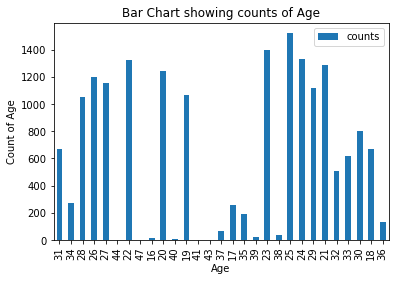

In [13]:
# making a bar chart  
Pandas_DF.plot.bar(x ='age', y = 'counts')
plt.title('Bar Chart showing counts of Age')
plt.xlabel('Age')
plt.ylabel('Count of Age');

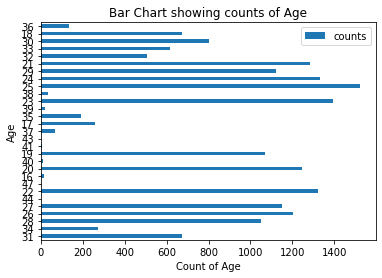

In [16]:
Pandas_DF.plot.barh(x ='age', y = 'counts')
plt.title('Bar Chart showing counts of Age')
plt.ylabel('Age')
plt.xlabel('Count of Age');

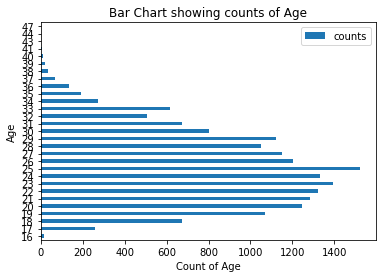

In [18]:
Pandas_DF.sort_values(by='age', ascending=True ).plot.barh(x='age', y='counts')
plt.title('Bar Chart showing counts of Age')
plt.ylabel('Age')
plt.xlabel('Count of Age');

In [23]:
# counting the number of players in each club
sqlDF = spark.sql('SELECT Club, count(*) as counts FROM FifaView GROUP By Club')
sqlDF.show()

+--------------------+------+
|                Club|counts|
+--------------------+------+
|             Palermo|    28|
|         Yeovil Town|    21|
|  1. FC Union Berlin|    27|
|  Santiago Wanderers|    20|
|               Carpi|    30|
|Evkur Yeni Malaty...|    30|
|          Sagan Tosu|    25|
|            FC Basel|    25|
|  Argentinos Juniors|    28|
|       Karlsruher SC|    27|
|  Lorca Deportiva CF|    29|
|     SC Paderborn 07|    28|
|     Cheltenham Town|    28|
|San Lorenzo de Al...|    28|
|         SC Freiburg|    32|
|  SpVgg Unterhaching|    28|
|Atletico Nacional...|    28|
|Universidad Católica|    20|
|         GFC Ajaccio|    25|
|           FC Luzern|    27|
+--------------------+------+
only showing top 20 rows



In [24]:
# counting the number of players in each club with more than 33 players
sqlDF = spark.sql('SELECT Club, count(*) FROM FifaView GROUP By Club HAVING count(*) > 33')
sqlDF.show()

+------------------+--------+
|              Club|count(1)|
+------------------+--------+
| Manchester United|      34|
|     UD Las Palmas|      34|
|              null|     248|
|Olympique Lyonnais|      34|
|     VfL Wolfsburg|      34|
|          OGC Nice|      34|
|     Villarreal CF|      35|
|         FC Nantes|      34|
| Borussia Dortmund|      34|
+------------------+--------+



In [25]:
# converting to Pandas DataFrame
Pandas_df = sqlDF.toPandas()

In [26]:
Pandas_df.head(4)

,Club,count(1)
0,Manchester United,34
1,UD Las Palmas,34
2,None,248
3,Olympique Lyonnais,34


In [20]:
fifa_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [25]:
fifa_df.select('overall', 'potential').show()

+-------+---------+
|overall|potential|
+-------+---------+
|     94|       94|
|     93|       93|
|     92|       94|
|     92|       92|
|     92|       92|
|     91|       91|
|     90|       92|
|     90|       91|
|     90|       90|
|     90|       90|
|     90|       90|
|     89|       92|
|     89|       92|
|     89|       89|
|     89|       89|
|     89|       89|
|     89|       89|
|     89|       89|
|     89|       89|
|     88|       93|
+-------+---------+
only showing top 20 rows

